# Stock Market Analysis with Python

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. I will use pandas to get stock information, visualize different aspects of our data, analyze the risk of a stock based on its previous performance history, and predict future stock prices through a Monte Carlo method!

I'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?

### Import python packages and datasets

In [181]:
# For manipulating datasets
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Use Yahoo and pandas to grab data for some tech stocks.

In [182]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
# We're grabbing a year's worth of data
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting each as a dataframe
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)

### Step 2: Generate descriptive statistics using .head(), .describe(), and .info()

In [183]:
# We're working with 4 datasets that have the same format
# let's start with AAPL to get an understanding what our datasets look like
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758
2019-04-08,200.229996,196.339996,196.419998,200.100006,25881700.0,197.514709


In [184]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,241.217362,236.013189,238.277362,238.833701,3.239519e+07,237.648926
std,43.647027,42.369388,42.885597,43.203677,1.728737e+07,43.777148
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,204.602505,201.577499,203.129997,202.957497,2.129230e+07,201.263817
50%,225.500000,220.579994,223.930000,223.779999,2.697120e+07,222.581909
75%,270.949997,265.370010,267.427505,268.320007,3.597765e+07,267.684708
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [185]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-04-02 to 2020-04-02
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


### Step 3: Exploratory Data Analysis

Text(0, 0.5, 'Price per share')

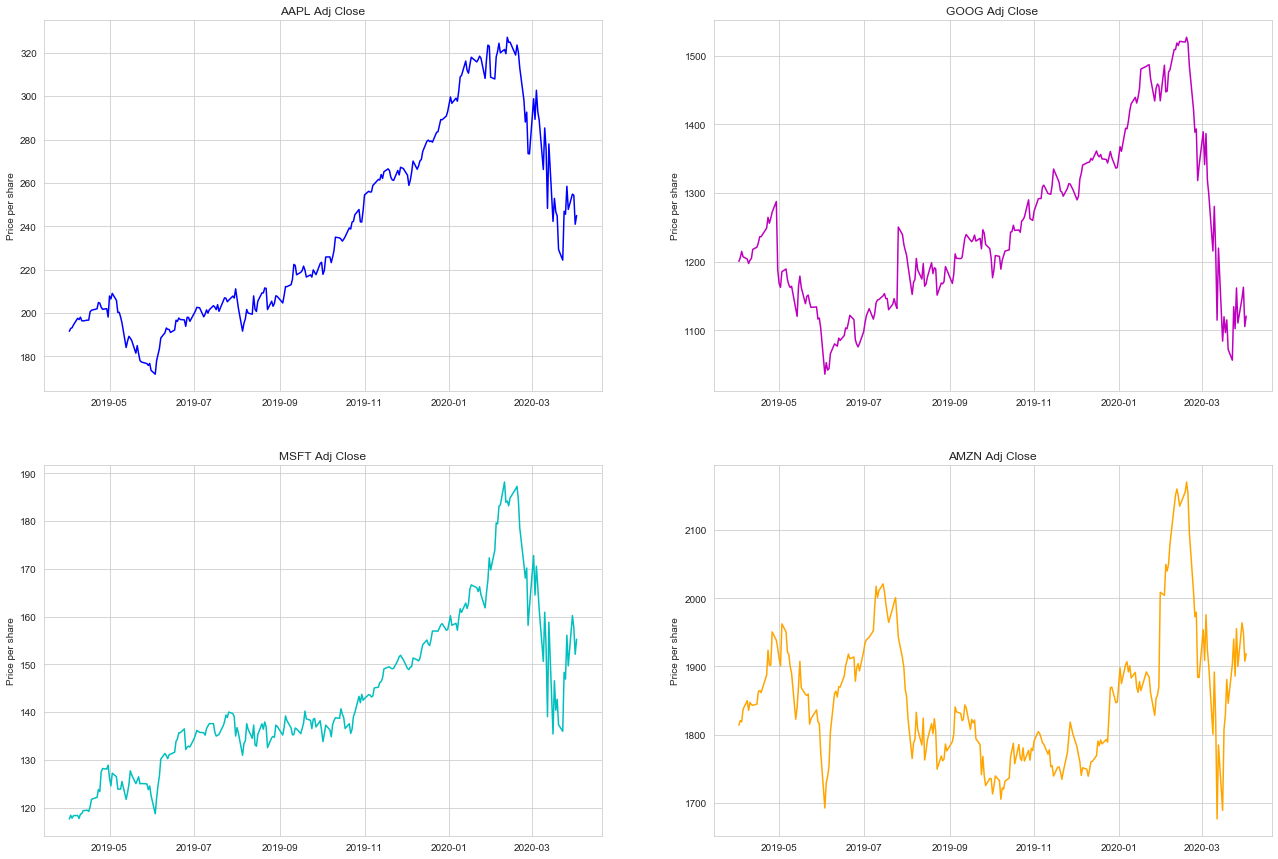

In [186]:
# Let's view the historical closing prices for each stock
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

axes[0, 0].plot(AAPL.index, AAPL['Adj Close'],color='blue')
axes[0, 0].set_title('AAPL Adj Close')
axes[0, 0].set_ylabel('Price per share')

axes[0, 1].plot(GOOG.index, GOOG['Adj Close'], color='m')
axes[0, 1].set_title('GOOG Adj Close')
axes[0, 1].set_ylabel('Price per share')

axes[1, 0].plot(MSFT.index, MSFT['Adj Close'], color='c')
axes[1, 0].set_title('MSFT Adj Close')
axes[1, 0].set_ylabel('Price per share')

axes[1, 1].plot(AMZN.index, AMZN['Adj Close'], color='orange')
axes[1, 1].set_title('AMZN Adj Close')
axes[1, 1].set_ylabel('Price per share')

#### Let's look at the total volume traded each day for the past year next

Text(0, 0.5, 'number of shares traded')

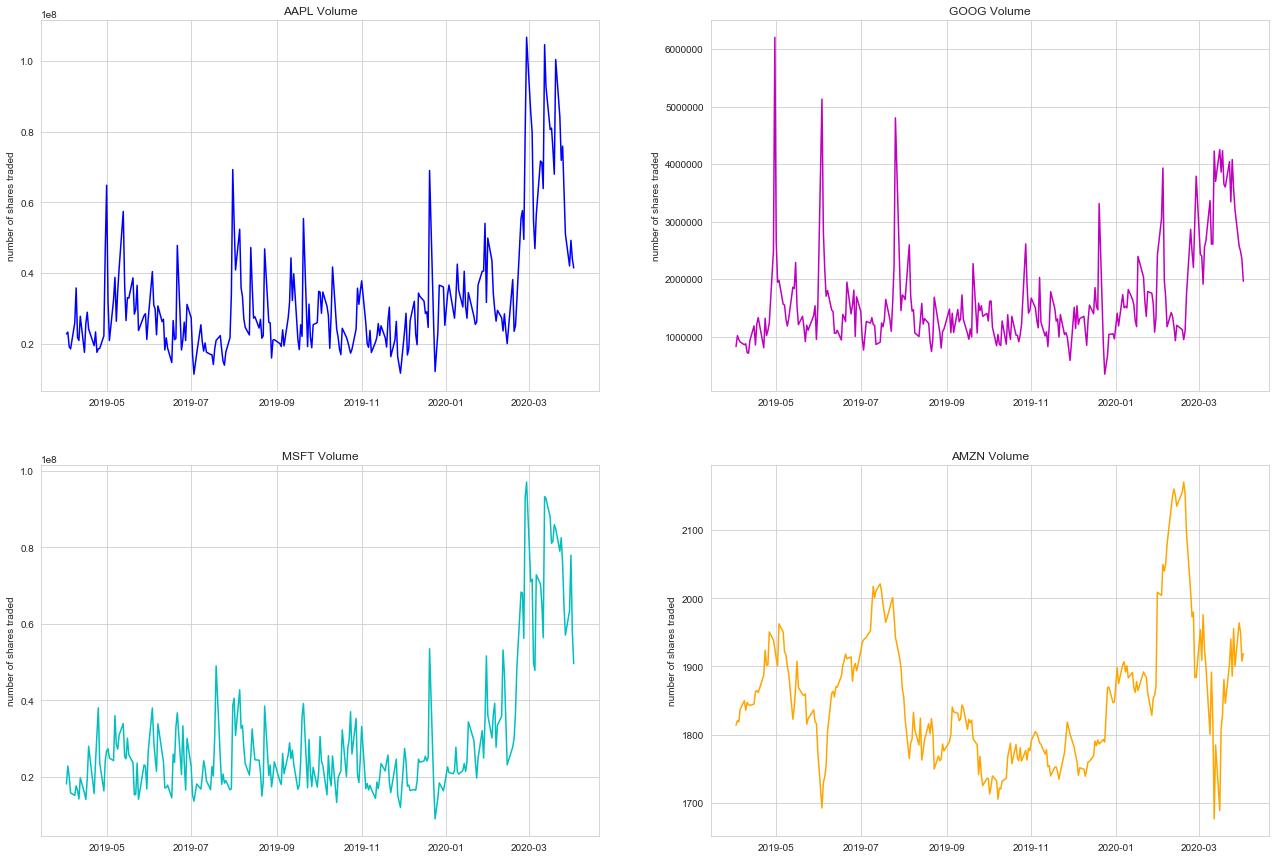

In [187]:
# Let's view the historical daily trading volumes for each stock
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

axes[0, 0].plot(AAPL.index, AAPL['Volume'], color='blue')
axes[0, 0].set_title('AAPL Volume')
axes[0, 0].set_ylabel('number of shares traded')

axes[0, 1].plot(GOOG.index, GOOG['Volume'], color='m')
axes[0, 1].set_title('GOOG Volume')
axes[0, 1].set_ylabel('number of shares traded')

axes[1, 0].plot(MSFT.index, MSFT['Volume'], color='c')
axes[1, 0].set_title('MSFT Volume')
axes[1, 0].set_ylabel('number of shares traded')

axes[1, 1].plot(AMZN.index, AMZN['Adj Close'], color='orange')
axes[1, 1].set_title('AMZN Volume')
axes[1, 1].set_ylabel('number of shares traded')

#### Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [188]:
# Use pandas built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]
l1 = [AAPL, GOOG, MSFT, AMZN]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    for i in l1:
        i[column_name]=i['Adj Close'].rolling(ma).mean()

Text(0, 0.5, 'Price per share')

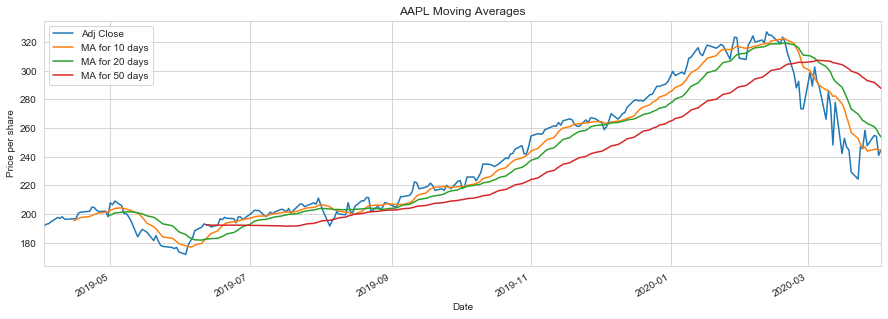

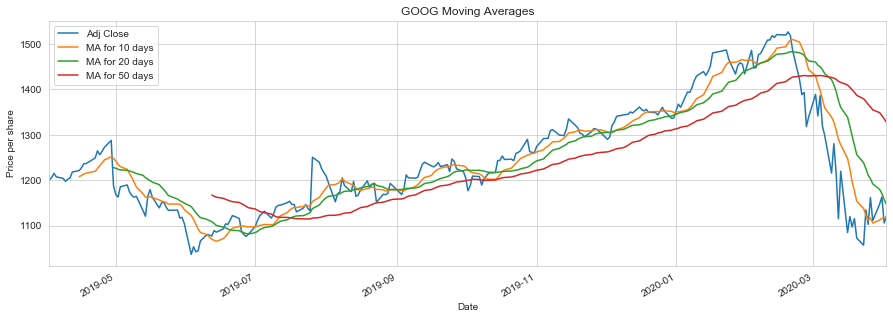

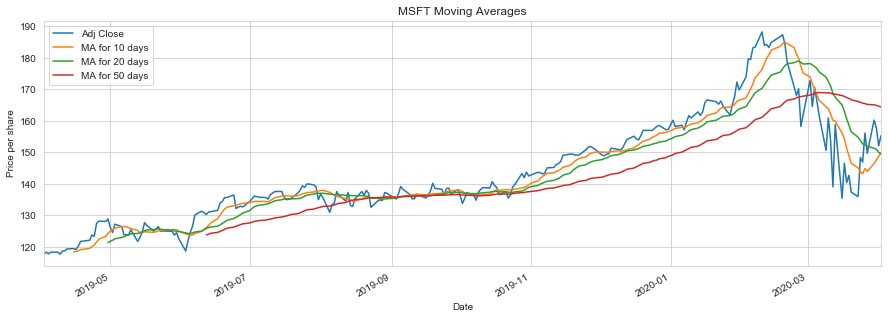

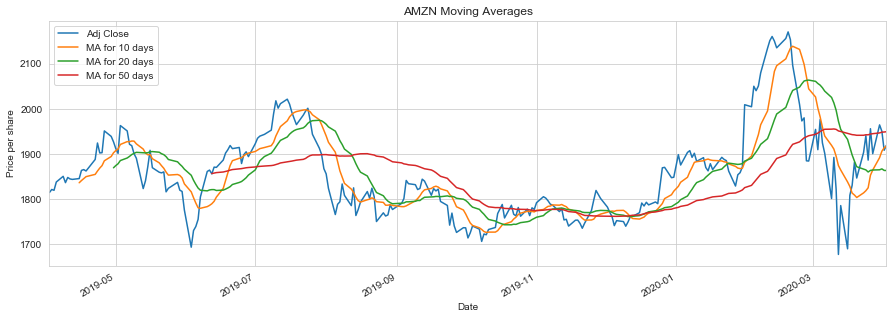

In [189]:
# Let's view the moving averages for each stock

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('AAPL Moving Averages')
plt.ylabel('Price per share')

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('GOOG Moving Averages')
plt.ylabel('Price per share')

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('MSFT Moving Averages')
plt.ylabel('Price per share')

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,5))
plt.title('AMZN Moving Averages')
plt.ylabel('Price per share')

#### Part 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock. We'll use pandas to retrieve the daily returns for each stock.

Text(0, 0.5, 'daily return')

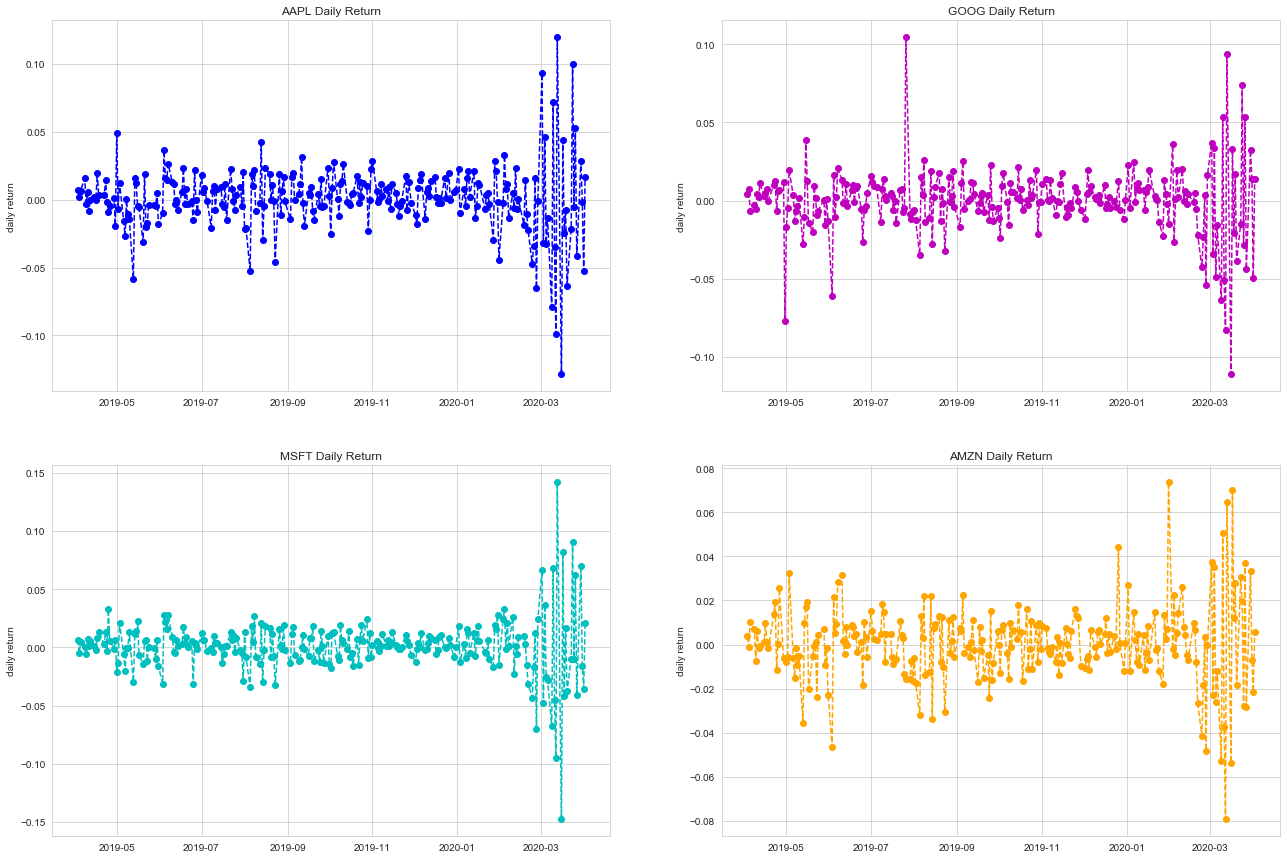

In [190]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 15))

axes[0, 0].plot(AAPL.index, AAPL['Daily Return'],linestyle='--',marker='o', color='blue')
axes[0, 0].set_title('AAPL Daily Return')
axes[0, 0].set_ylabel('daily return')

axes[0, 1].plot(GOOG.index, GOOG['Daily Return'],linestyle='--',marker='o', color='m')
axes[0, 1].set_title('GOOG Daily Return')
axes[0, 1].set_ylabel('daily return')

axes[1, 0].plot(MSFT.index, MSFT['Daily Return'],linestyle='--',marker='o', color='c')
axes[1, 0].set_title('MSFT Daily Return')
axes[1, 0].set_ylabel('daily return')

axes[1, 1].plot(AMZN.index, AMZN['Daily Return'],linestyle='--',marker='o', color='orange')
axes[1, 1].set_title('AMZN Daily Return')
axes[1, 1].set_ylabel('daily return')

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

Text(0.5, 1.0, 'AMZN Daily Return')

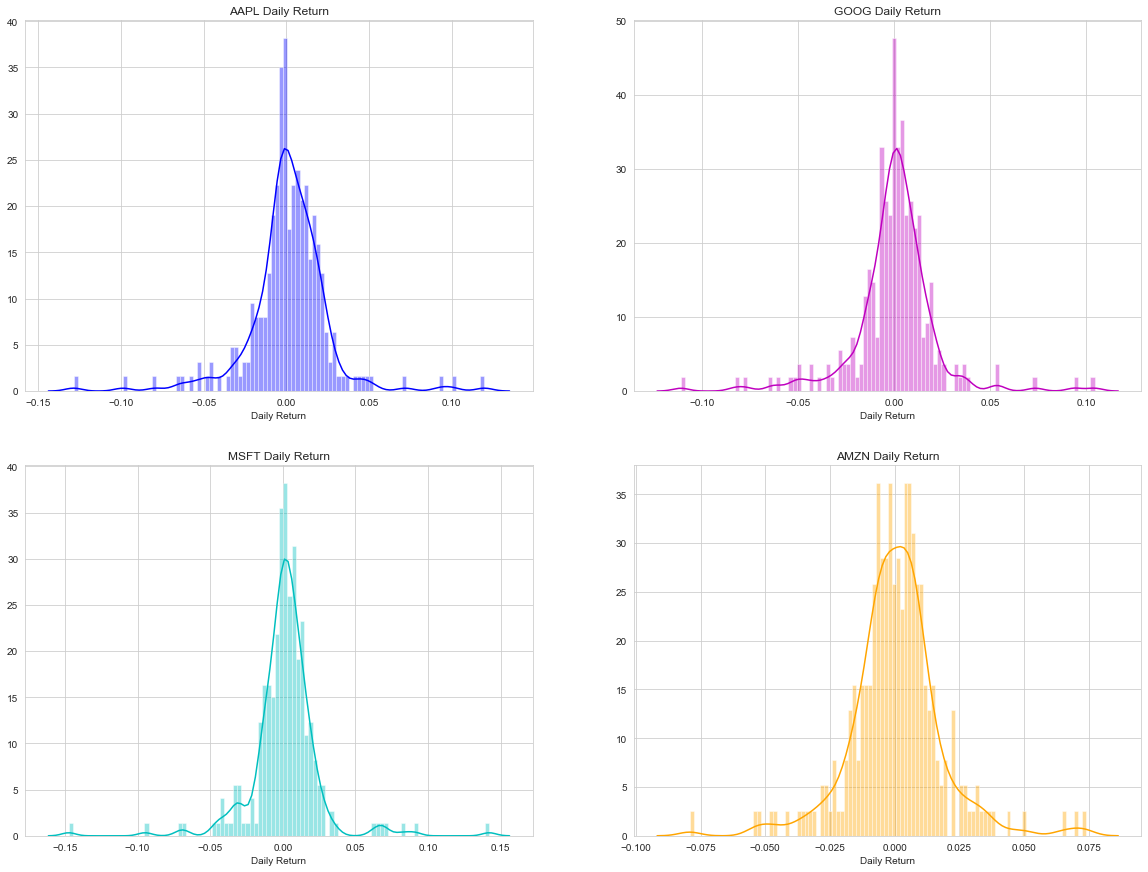

In [191]:
# Set up the matplotlib figure
figure, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=False)

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue', ax=axes[0,0])
axes[0, 0].set_title('AAPL Daily Return')

sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='m', ax=axes[0,1])
axes[0, 1].set_title('GOOG Daily Return')

sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='c', ax=axes[1,0])
axes[1, 0].set_title('MSFT Daily Return')

sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='orange', ax=axes[1,1])
axes[1, 1].set_title('AMZN Daily Return')

##### Let's build a DataFrame with all the ['Adj Close'] columns for each of the stocks dataframes to analyze the returns of all the stocks in our list

In [192]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [193]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-04-02,191.513290,1813.979980,1200.489990,117.633636
2019-04-03,192.826111,1820.699951,1205.920044,118.403458
2019-04-04,193.161682,1818.859985,1215.000000,117.801422
2019-04-05,194.454758,1837.280029,1207.150024,118.324493
2019-04-08,197.514709,1849.859985,1203.839966,118.363968


In [194]:
# Make a new tech returns DataFrame for the pct_change
tech_rets = closing_df.pct_change()

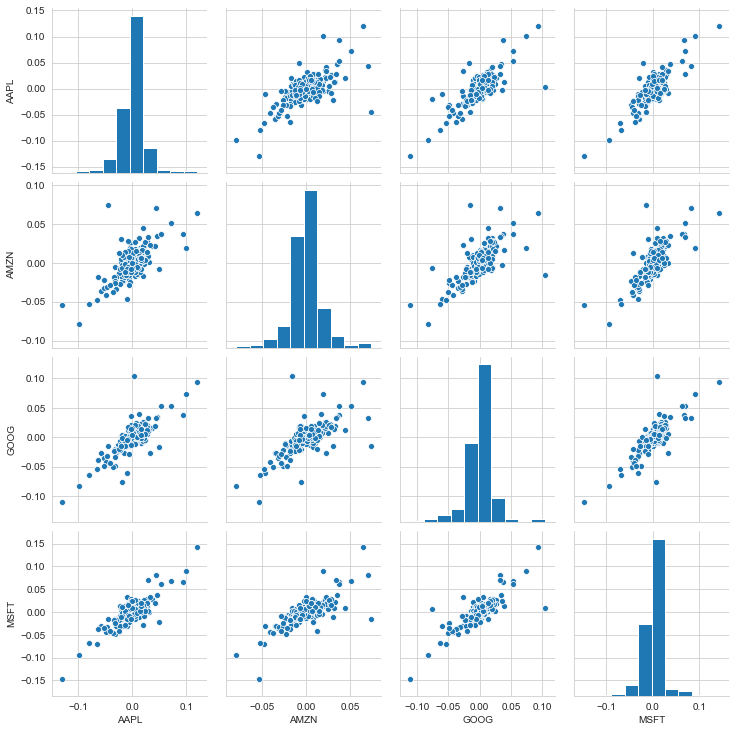

In [195]:
# Call pairplot on our DataFrame for an automatic visual analysis of all possible correlations
sns.pairplot(tech_rets.dropna())

##### Above we can see all the relationships on daily returns between all the stocks. It might be interesting to investigate each individual comaprison as most relationship look fairly correlated

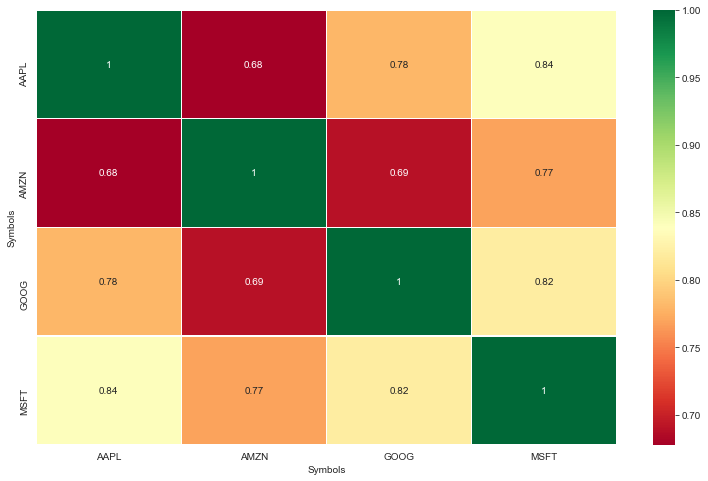

In [196]:
plt.figure(figsize = (13,8))
sns.heatmap(tech_rets.corr(), annot=True, cmap="RdYlGn",linewidths=.5)

As you may have suspected, these tech companies are all positively correlated with MFST and AAPL having the  strongest correlation.

### Step 4: Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Text(75, 0, 'AMZN')

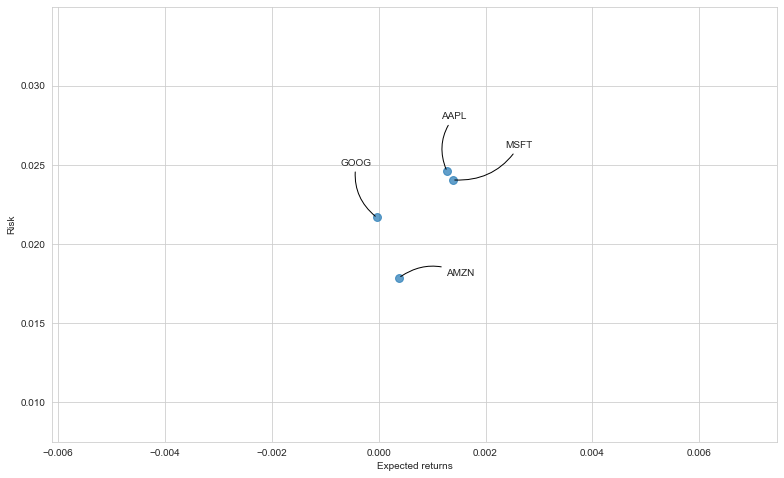

In [197]:
# Reminder of what tech_rets is
# closing_df is adj close prices of each stock
# tech_rets = closing_df.pct_change()

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

#define area of circles on plot so they are visible
area = np.pi*20

plt.figure(figsize = (13,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.7,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.annotate(
        'MSFT', 
        xy = (rets.MSFT.mean(), rets.MSFT.std()), xytext = (80, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color='black'))
plt.annotate(
        'AAPL', 
        xy = (rets.AAPL.mean(), rets.AAPL.std()), xytext = (20, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.3', color='black'))
plt.annotate(
        'GOOG', 
        xy = (rets.GOOG.mean(), rets.GOOG.std()), xytext = (-5, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.3', color='black'))
plt.annotate(
        'AMZN', 
        xy = (rets.AMZN.mean(), rets.AMZN.std()), xytext = (75, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.3', color='black'))


#### Value at Risk

Let's define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. 

##### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns

Text(0.5, 1.0, 'AMZN Daily Return')

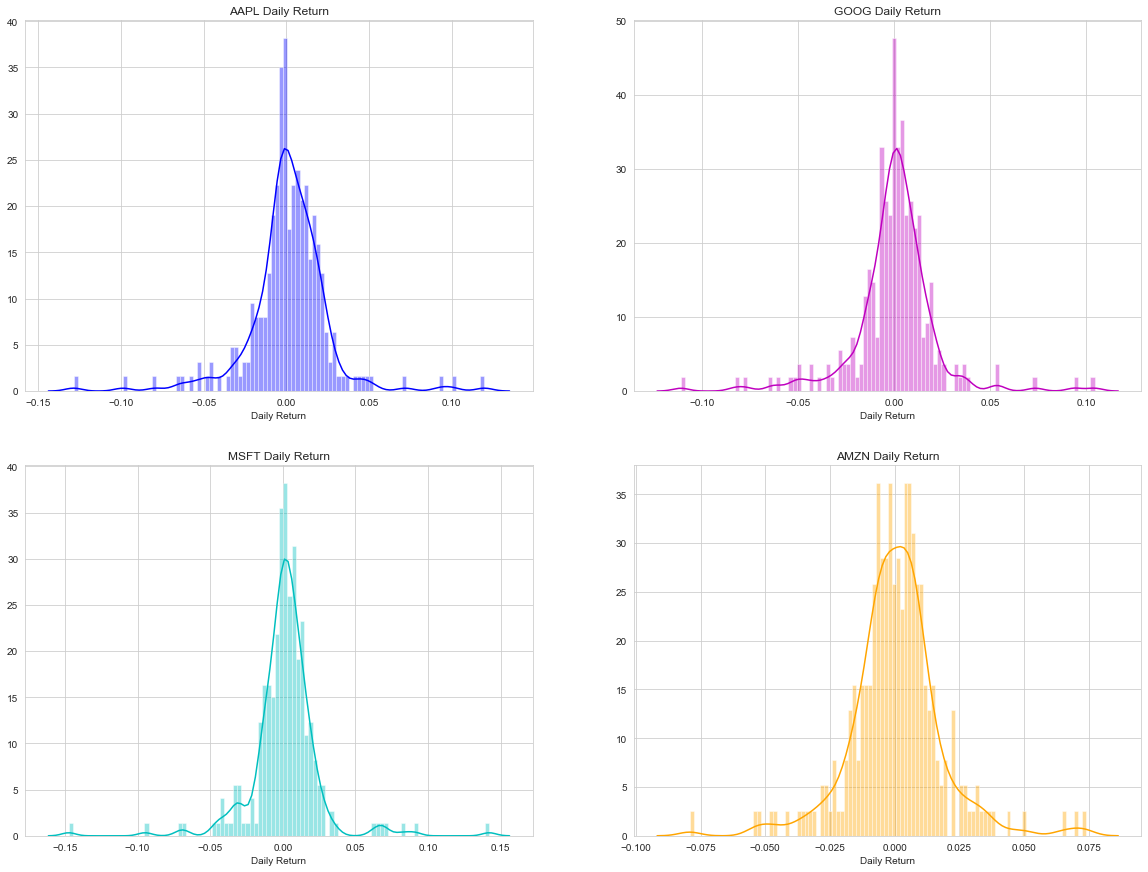

In [198]:
# Set up the matplotlib figure
figure, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=False)

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue', ax=axes[0,0])
axes[0, 0].set_title('AAPL Daily Return')

sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='m', ax=axes[0,1])
axes[0, 1].set_title('GOOG Daily Return')

sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='c', ax=axes[1,0])
axes[1, 0].set_title('MSFT Daily Return')

sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='orange', ax=axes[1,1])
axes[1, 1].set_title('AMZN Daily Return')

Now we can use quantile to get the risk value for the stock.

In [199]:
# The 0.05 empirical quantile of daily returns for each stock
# remember that the rets DataFrame contains the pct_change for each stock's 'adj close' price
aapl_eq = round(rets['AAPL'].quantile(0.05), 3)
goog_eq = round(rets['GOOG'].quantile(0.05), 3)
msft_eq = round(rets['MSFT'].quantile(0.05), 3)
amzn_eq = round(rets['AMZN'].quantile(0.05), 3)

print(f'The 0.05 empirical quantile of daily returns for Apple is at {aapl_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(aapl_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(aapl_eq)} * 1,000,000 = ${round(abs(aapl_eq)*1000000,1)}. \n')

print(f'The 0.05 empirical quantile of daily returns for Google is at {goog_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(goog_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(goog_eq)} * 1,000,000 = ${round(abs(goog_eq)*1000000,1)}. \n')

print(f'The 0.05 empirical quantile of daily returns for Microsoft is at {msft_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(msft_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(msft_eq)} * 1,000,000 = ${round(abs(msft_eq)*1000000,1)}. \n')

print(f'The 0.05 empirical quantile of daily returns for Amazon is at {amzn_eq}. \n That means that with 95% confidence, our worst daily loss will not exceed {round(abs(amzn_eq)*100,1)}%. \n If we have a 1 million dollar investment, our one-day 5% VaR is {abs(amzn_eq)} * 1,000,000 = ${round(abs(amzn_eq)*1000000,1)}. \n')

The 0.05 empirical quantile of daily returns for Apple is at -0.034. 
 That means that with 95% confidence, our worst daily loss will not exceed 3.4%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34000.0. 

The 0.05 empirical quantile of daily returns for Google is at -0.035. 
 That means that with 95% confidence, our worst daily loss will not exceed 3.5%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.035 * 1,000,000 = $35000.0. 

The 0.05 empirical quantile of daily returns for Microsoft is at -0.032. 
 That means that with 95% confidence, our worst daily loss will not exceed 3.2%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32000.0. 

The 0.05 empirical quantile of daily returns for Amazon is at -0.027. 
 That means that with 95% confidence, our worst daily loss will not exceed 2.7%. 
 If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = $27000.0. 